# Day 09. Exercise 00
# Regularization

## 0. Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [79]:
df = pd.read_csv('../data/dayofweek.csv')

In [80]:
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
X = df.drop(columns=['dayofweek'], axis=1)
y = df['dayofweek']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [83]:
clf = LogisticRegression(random_state=21, fit_intercept=False, solver="saga")

In [84]:
def crossval(model, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    cv = StratifiedKFold(n_splits=n_splits)
    for train, valid in cv.split(X, y):
        model.fit(X.iloc[train], y.iloc[train])
        y_train_pred = model.predict(X.iloc[train])
        y_valid_pred = model.predict(X.iloc[valid])
        train_scores.append(accuracy_score(y.iloc[train], y_train_pred))
        valid_scores.append(accuracy_score(y.iloc[valid], y_valid_pred))
    for i in range(len(train_scores)):
        print(f'train -  {train_scores[i]:.5f}   |   valid -  {valid_scores[i]:.5f}')
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')

In [85]:
%%time
crossval(clf, X_train, y_train)

train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64221   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: total: 812 ms
Wall time: 811 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [86]:
%%time
clf = LogisticRegression(penalty='none', random_state=21, fit_intercept=False, max_iter=1000)
clf.fit(X_train, y_train)
crossval(clf, X_train, y_train)

train -  0.66612   |   valid -  0.63704
train -  0.65787   |   valid -  0.65926
train -  0.66694   |   valid -  0.57778
train -  0.66529   |   valid -  0.62963
train -  0.66694   |   valid -  0.62222
train -  0.65952   |   valid -  0.57778
train -  0.65045   |   valid -  0.69630
train -  0.68425   |   valid -  0.61481
train -  0.66474   |   valid -  0.62687
train -  0.65651   |   valid -  0.60448
Average accuracy on crossval is 0.62462
Std is 0.03379
CPU times: total: 5.5 s
Wall time: 2.5 s


In [87]:
clf = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', random_state=21, fit_intercept=False))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(fit_intercept=False,
                                                 penalty='l1', random_state=21,
                                                 solver='liblinear'))

In [88]:
%%time
crossval(clf, X_train, y_train)

train -  0.61830   |   valid -  0.54815
train -  0.62737   |   valid -  0.62222
train -  0.60511   |   valid -  0.54074
train -  0.63644   |   valid -  0.62222
train -  0.62407   |   valid -  0.55556
train -  0.62325   |   valid -  0.58519
train -  0.61253   |   valid -  0.63704
train -  0.64716   |   valid -  0.58519
train -  0.63015   |   valid -  0.59701
train -  0.61367   |   valid -  0.59701
Average accuracy on crossval is 0.58903
Std is 0.03129
CPU times: total: 406 ms
Wall time: 357 ms


In [89]:
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', solver='liblinear', random_state=21, fit_intercept=False))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(fit_intercept=False,
                                                 random_state=21,
                                                 solver='liblinear'))

In [90]:
%%time
crossval(clf, X_train, y_train)

train -  0.61006   |   valid -  0.56296
train -  0.61665   |   valid -  0.61481
train -  0.61336   |   valid -  0.59259
train -  0.62902   |   valid -  0.60741
train -  0.60923   |   valid -  0.55556
train -  0.61500   |   valid -  0.57778
train -  0.61665   |   valid -  0.61481
train -  0.64056   |   valid -  0.53333
train -  0.62109   |   valid -  0.58209
train -  0.61120   |   valid -  0.57463
Average accuracy on crossval is 0.58160
Std is 0.02532
CPU times: total: 328 ms
Wall time: 328 ms


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [91]:
svc = SVC(probability=True, kernel='linear', random_state=21)

In [92]:
%%time
crossval(svc, X_train, y_train)

train -  0.70486   |   valid -  0.65926
train -  0.69662   |   valid -  0.75556
train -  0.69415   |   valid -  0.62222
train -  0.70239   |   valid -  0.65185
train -  0.69085   |   valid -  0.65185
train -  0.68920   |   valid -  0.64444
train -  0.69250   |   valid -  0.72593
train -  0.70074   |   valid -  0.62222
train -  0.69605   |   valid -  0.61940
train -  0.71087   |   valid -  0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: total: 2.59 s
Wall time: 2.61 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [93]:
%%time
svc = SVC(C=0.5, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.66694   |   valid -  0.63704
train -  0.66612   |   valid -  0.73333
train -  0.67271   |   valid -  0.60741
train -  0.67354   |   valid -  0.62963
train -  0.67766   |   valid -  0.64444
train -  0.66529   |   valid -  0.61481
train -  0.66200   |   valid -  0.68889
train -  0.66529   |   valid -  0.57037
train -  0.67463   |   valid -  0.59701
train -  0.66804   |   valid -  0.61194
Average accuracy on crossval is 0.63349
Std is 0.04471
CPU times: total: 2.56 s
Wall time: 2.56 s


In [94]:
%%time
svc = SVC(C=0.1, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.58120   |   valid -  0.55556
train -  0.57543   |   valid -  0.56296
train -  0.57378   |   valid -  0.57037
train -  0.59275   |   valid -  0.57037
train -  0.58120   |   valid -  0.54815
train -  0.57955   |   valid -  0.54815
train -  0.57296   |   valid -  0.61481
train -  0.59192   |   valid -  0.54815
train -  0.59967   |   valid -  0.52985
train -  0.57825   |   valid -  0.57463
Average accuracy on crossval is 0.56230
Std is 0.02177
CPU times: total: 2.75 s
Wall time: 2.75 s


In [95]:
%%time
svc = SVC(C=2, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.70734   |   valid -  0.65926
train -  0.71393   |   valid -  0.75556
train -  0.74526   |   valid -  0.63704
train -  0.71558   |   valid -  0.66667
train -  0.71146   |   valid -  0.67407
train -  0.70157   |   valid -  0.63704
train -  0.70651   |   valid -  0.71852
train -  0.70981   |   valid -  0.64444
train -  0.72405   |   valid -  0.64925
train -  0.72488   |   valid -  0.64179
Average accuracy on crossval is 0.66836
Std is 0.03721
CPU times: total: 2.72 s
Wall time: 2.69 s


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [96]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)

In [97]:
%%time
crossval(dtc, X_train, y_train)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74074
train -  0.83347   |   valid -  0.70370
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.75373
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: total: 62.5 ms
Wall time: 59.6 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [98]:
%%time
dtc = DecisionTreeClassifier(max_depth=15, random_state=21)
crossval(dtc, X_train, y_train)

train -  0.95796   |   valid -  0.82222
train -  0.93075   |   valid -  0.83704
train -  0.95631   |   valid -  0.83704
train -  0.95301   |   valid -  0.86667
train -  0.95136   |   valid -  0.88889
train -  0.94724   |   valid -  0.82222
train -  0.95466   |   valid -  0.90370
train -  0.94971   |   valid -  0.87407
train -  0.95305   |   valid -  0.83582
train -  0.94316   |   valid -  0.85821
Average accuracy on crossval is 0.85459
Std is 0.02682
CPU times: total: 78.1 ms
Wall time: 65.5 ms


In [99]:
%%time
dtc = DecisionTreeClassifier(max_depth=5, random_state=21)
crossval(dtc, X_train, y_train)

train -  0.59522   |   valid -  0.53333
train -  0.56307   |   valid -  0.53333
train -  0.60181   |   valid -  0.55556
train -  0.59604   |   valid -  0.57037
train -  0.60264   |   valid -  0.57778
train -  0.57955   |   valid -  0.53333
train -  0.58368   |   valid -  0.54815
train -  0.59275   |   valid -  0.51111
train -  0.58237   |   valid -  0.56716
train -  0.60132   |   valid -  0.50000
Average accuracy on crossval is 0.54301
Std is 0.02423
CPU times: total: 62.5 ms
Wall time: 54.3 ms


In [100]:
%%time
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)
crossval(dtc, X_train, y_train)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74074
train -  0.83347   |   valid -  0.70370
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.75373
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: total: 62.5 ms
Wall time: 61 ms


In [101]:
param_grid = {'max_depth' : np.arange(2, 30)}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print(f'лучшие параметры: {gs.best_params_}')
print(f'лучший score: {gs.best_score_}')

лучшие параметры: {'max_depth': 21}
лучший score: 0.8686658405617512


In [102]:
%%time
dtc = DecisionTreeClassifier(max_depth=21, random_state=21)
crossval(dtc, X_train, y_train)

train -  0.99176   |   valid -  0.86667
train -  0.99176   |   valid -  0.90370
train -  0.99093   |   valid -  0.85926
train -  0.99176   |   valid -  0.89630
train -  0.99093   |   valid -  0.88148
train -  0.98516   |   valid -  0.88148
train -  0.98928   |   valid -  0.91852
train -  0.99423   |   valid -  0.87407
train -  0.99588   |   valid -  0.86567
train -  0.99012   |   valid -  0.88060
Average accuracy on crossval is 0.88278
Std is 0.01757
CPU times: total: 125 ms
Wall time: 79.9 ms


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [103]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)

In [104]:
%%time
crossval(rfc, X_train, y_train)

train -  0.96455   |   valid -  0.88148
train -  0.96208   |   valid -  0.91852
train -  0.96785   |   valid -  0.86667
train -  0.96455   |   valid -  0.89630
train -  0.96538   |   valid -  0.91111
train -  0.96538   |   valid -  0.88148
train -  0.97115   |   valid -  0.91852
train -  0.96867   |   valid -  0.85185
train -  0.97364   |   valid -  0.88060
train -  0.97941   |   valid -  0.86567
Average accuracy on crossval is 0.88722
Std is 0.02204
CPU times: total: 781 ms
Wall time: 784 ms


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [105]:
param_grid = {'max_depth' : np.arange(2, 30, 5), 
              'n_estimators' : np.arange(20, 100, 20)}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print(f'лучшие параметры: {gs.best_params_}')
print(f'лучший score: {gs.best_score_}')

лучшие параметры: {'max_depth': 27, 'n_estimators': 40}
лучший score: 0.8998457937491395


In [106]:
%%time
rfc = RandomForestClassifier(n_estimators=40, max_depth=27, random_state=21)
crossval(rfc, X_train, y_train)

train -  1.00000   |   valid -  0.91111
train -  0.99918   |   valid -  0.93333
train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.94074
train -  0.99918   |   valid -  0.91852
train -  0.99918   |   valid -  0.88889
train -  1.00000   |   valid -  0.92593
train -  1.00000   |   valid -  0.89630
train -  1.00000   |   valid -  0.93284
train -  0.99918   |   valid -  0.87313
Average accuracy on crossval is 0.91245
Std is 0.02076
CPU times: total: 750 ms
Wall time: 738 ms


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [107]:
best_model = RandomForestClassifier(n_estimators=40, max_depth=27, random_state=21)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred)

0.9319526627218935

In [109]:
classes = np.unique(y_test)
error_rates = {}

for cls in classes:
    idx = y_test == cls
    total = np.sum(idx)
    errors = np.sum(y_pred[idx] != cls)
    error_pct = errors / total * 100
    error_rates[cls] = error_pct
    print(f"Class {cls}: {errors} errors out of {total} ({error_pct:.2f}%)")

Class 0: 7 errors out of 27 (25.93%)
Class 1: 3 errors out of 55 (5.45%)
Class 2: 2 errors out of 30 (6.67%)
Class 3: 3 errors out of 80 (3.75%)
Class 4: 3 errors out of 21 (14.29%)
Class 5: 4 errors out of 54 (7.41%)
Class 6: 1 errors out of 71 (1.41%)


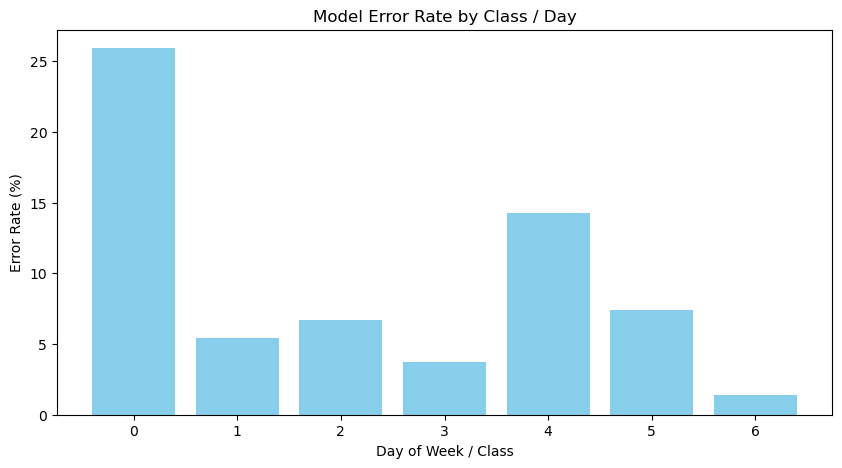


Наибольшее количество ошибок в день 0: 25.93%


In [110]:
plt.figure(figsize=(10, 5))
plt.bar(error_rates.keys(), error_rates.values(), color='skyblue')
plt.xlabel('Day of Week / Class')
plt.ylabel('Error Rate (%)')
plt.title('Model Error Rate by Class / Day')
plt.show()

worst_day = max(error_rates, key=error_rates.get)
print(f"\nНаибольшее количество ошибок в день {worst_day}: {error_rates[worst_day]:.2f}%")

In [111]:
joblib.dump(best_model, 'best_model.joblib')
print("Модель сохранена как 'best_model.joblib'")

Модель сохранена как 'best_model.joblib'
